<a href="https://colab.research.google.com/github/lihui1625/deepleaning/blob/main/code4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#train_data[0]
train_labels[0]

max([max(sequence) for sequence in train_data])

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [25]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, seq in enumerate(sequences):
    for j in seq:
      results[i, j] = 1.0
  return results



In [26]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asanyarray(train_labels).astype("float32")
y_test = np.asanyarray(test_labels).astype("float32")

print(x_train[0])
print(y_train[0])
print(x_test[0])
print(y_test[0])

[0. 1. 1. ... 0. 0. 0.]
1.0
[0. 1. 1. ... 0. 0. 0.]
0.0


In [27]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train=x_train[10000:]
y_val = y_train[:10000]
partial_y_train=y_train[10000:]

In [28]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history
print(history_dict.keys())

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.5454 - accuracy: 0.7697 - val_loss: 0.4075 - val_accuracy: 0.8593
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3269 - accuracy: 0.8929 - val_loss: 0.3396 - val_accuracy: 0.8596
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2427 - accuracy: 0.9183 - val_loss: 0.2912 - val_accuracy: 0.8853
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1953 - accuracy: 0.9339 - val_loss: 0.2824 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1617 - accuracy: 0.9460 - val_loss: 0.2875 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1346 - accuracy: 0.9556 - val_loss: 0.2898 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1161 - accuracy: 0.9629 - val_loss: 0.3211 - val_accuracy: 0.8809
Epoch 8/20
30

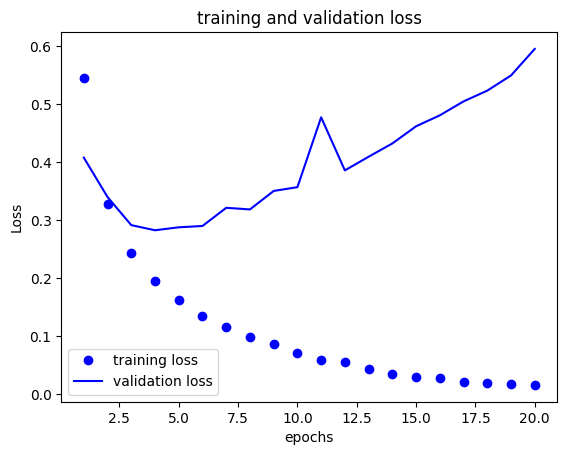

In [29]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_value = history_dict["loss"]
val_loss_value = history_dict["val_loss"]
epochs = range(1, len(loss_value) + 1)

plt.plot(epochs, loss_value, "bo", label="training loss")
plt.plot(epochs, val_loss_value, "b", label="validation loss")
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


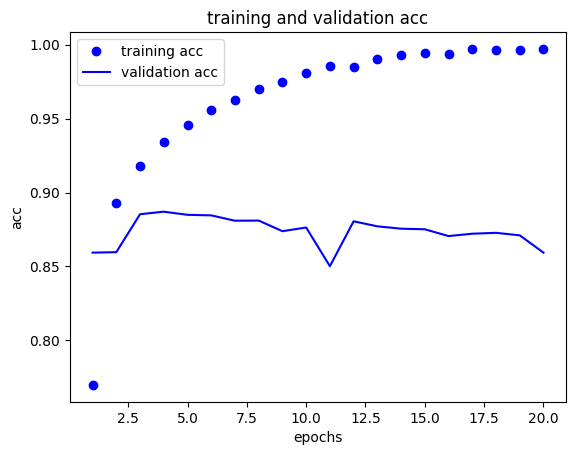

In [30]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="training acc")
plt.plot(epochs, val_acc, "b", label="validation acc")
plt.title("training and validation acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [31]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 13ms/step - loss: 0.4514 - accuracy: 0.8163
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2634 - accuracy: 0.9060
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2069 - accuracy: 0.9243
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2914 - accuracy: 0.8860
[0.2914063632488251, 0.8859599828720093]


In [32]:
results = model.predict(x_test)
print(results)

782/782 [==============================] - 1s 2ms/step
[[0.21227257]
 [0.99991333]
 [0.94365   ]
 ...
 [0.12486564]
 [0.08819219]
 [0.6752228 ]]
